In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Step 1: Data Loading and Inspection
data = pd.read_csv("AccidentsBig.csv")

# Display basic information about the dataset
print("Shape of the dataset:", data.shape)
print("Columns in the dataset:", data.columns)
print("Sample records from the dataset:")
data.head()



<ipython-input-1-7ce7135f5aac>:8: DtypeWarning: Columns (8,10,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("AccidentsBig.csv")


Shape of the dataset: (1048575, 30)
Columns in the dataset: Index(['Accident_Index', 'longitude', 'latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Date'],
      dtype='object')
Sample records from the dataset:


,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
0,1.0,78.610393,14.724026,1.0,2.0,1.0,1.0,3.0,17:42,12.0,...,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849,04-01-2018
1,2.0,78.534042,14.762353,1.0,3.0,1.0,1.0,4.0,17:36,12.0,...,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909,05-01-2018
2,3.0,78.470877,14.745606,1.0,3.0,2.0,1.0,5.0,00:15,12.0,...,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002857,06-01-2018
3,4.0,78.557994,14.667128,1.0,3.0,1.0,1.0,6.0,10:35,12.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002840,07-01-2018
4,5.0,78.576431,14.703443,1.0,3.0,1.0,1.0,2.0,21:13,12.0,...,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002863,10-01-2018


<ipython-input-15-33abcaf9ca26>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['Accident_Severity'], bins=50, kde=True, palette='palette')


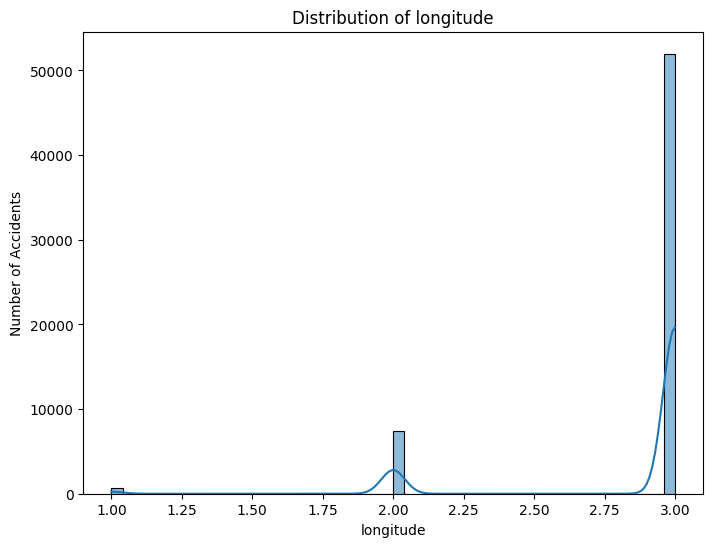

<ipython-input-15-33abcaf9ca26>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['Accident_Severity'], bins=50, kde=True, palette='palette')


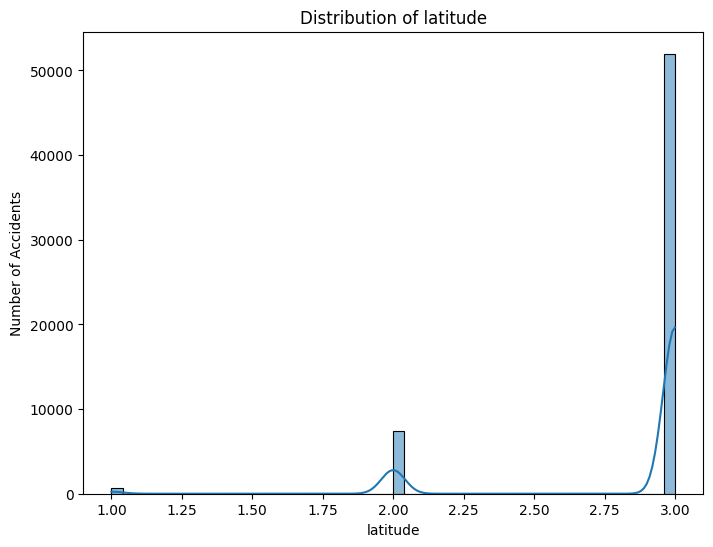

<ipython-input-15-33abcaf9ca26>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['Accident_Severity'], bins=50, kde=True, palette='palette')


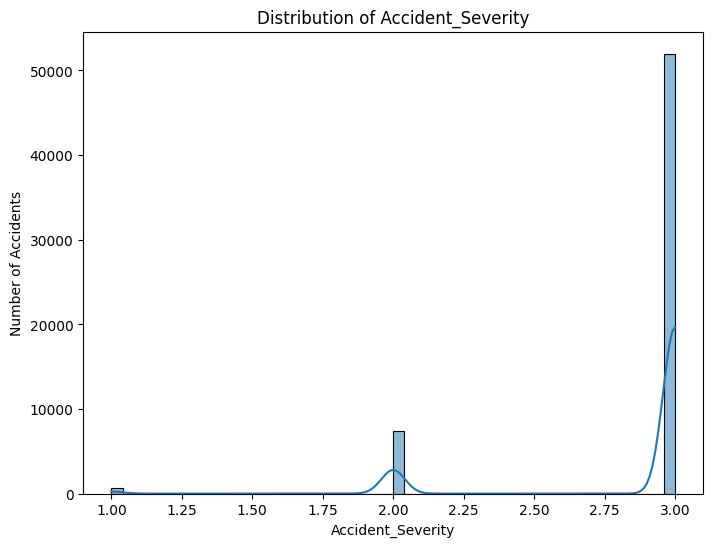

<ipython-input-15-33abcaf9ca26>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['Accident_Severity'], bins=50, kde=True, palette='palette')


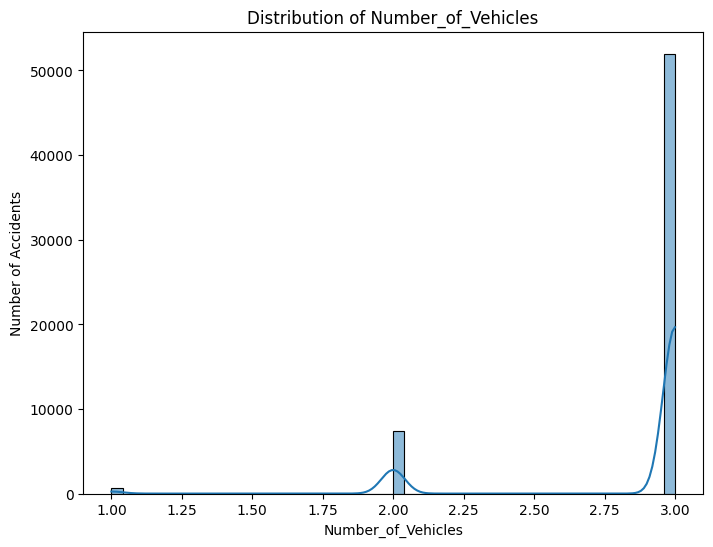

<ipython-input-15-33abcaf9ca26>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['Accident_Severity'], bins=50, kde=True, palette='palette')


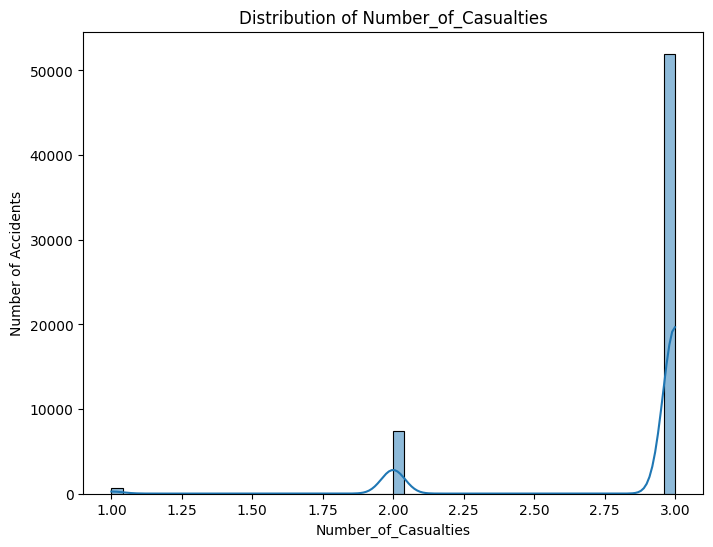

<ipython-input-15-33abcaf9ca26>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['Accident_Severity'], bins=50, kde=True, palette='palette')


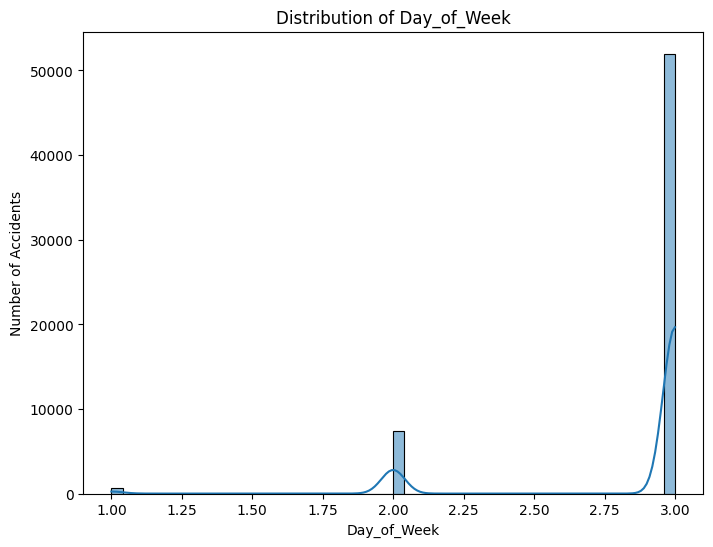

In [ ]:
# Step 2: Data Preprocessing
# No preprocessing needed for numerical columns

# Step 3: Exploratory Data Analysis (EDA)
# Analyze numerical columns
numerical_columns = ['longitude', 'latitude', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data['Accident_Severity'], bins=50, kde=True, palette='palette')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Number of Accidents')
    plt.show()




In [ ]:
# Step 4: Visualization - Accident Hotspots
# Check for missing values
missing_values = data[['latitude', 'longitude']].isnull().any(axis=1)
print(f"Number of rows with missing values: {missing_values.sum()}")

# Handle missing values (e.g., remove rows or impute missing values)
# For example, to remove rows with missing values:
data = data.dropna(subset=['latitude', 'longitude'])



Number of rows with missing values: 0


In [ ]:
# Create a heatmap of accident locations based on latitude and longitude
accident_map = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=5)
heat_data = [[row['latitude'], row['longitude']] for index, row in data.sample(10000).iterrows()]
HeatMap(heat_data).add_to(accident_map)
accident_map.save('accident_heatmap.html')
accident_map

<ipython-input-13-54853796bd7f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Accident_Severity', data=data, palette='viridis')


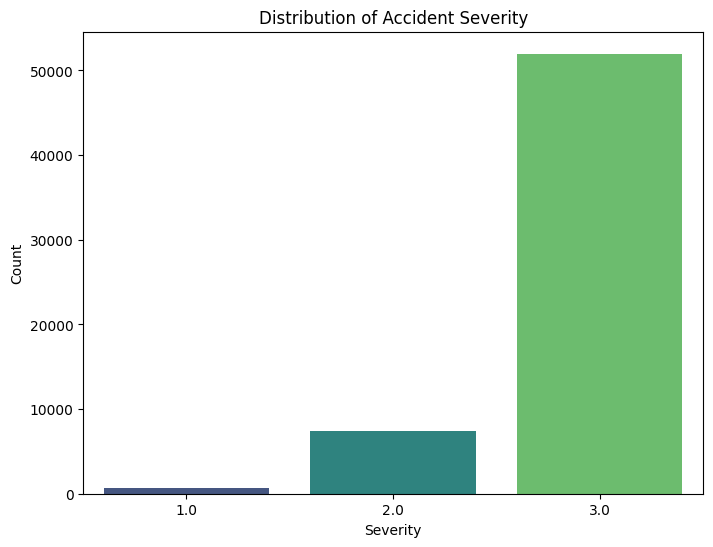

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Accident_Severity', data=data, palette='viridis')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()


<ipython-input-14-58ebcbf7d4bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_Week', data=data, palette='viridis')


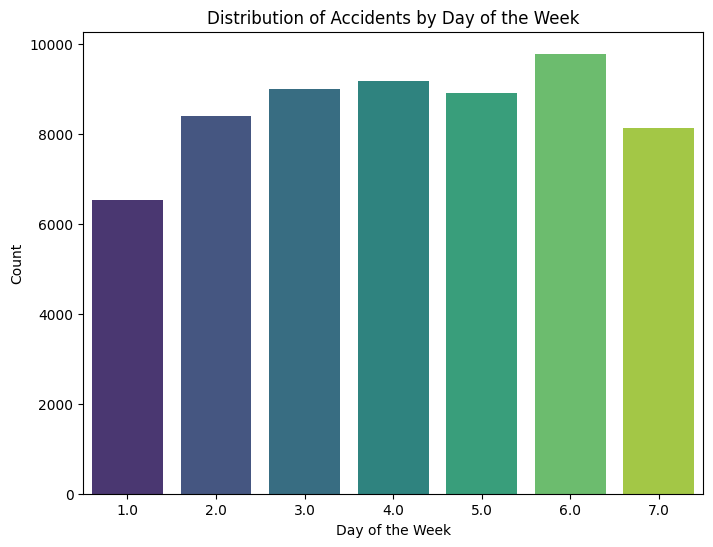

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Day_of_Week', data=data, palette='viridis')
plt.title('Distribution of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()